# Gradient Boosting Example
We implement a basic version of gradient boosting for regression. First we import the libraries we need and define some helper functions we are going to use to plot the model prediction and the residuals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# set the font for plotting and the figure size
font = {'size': 14}
plt.rc('font', **font)
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

## Helper Functions

In [2]:
def GenerateData():
    X = np.arange(0,50)
    # just random uniform distributions in differnt range

    y1 = np.random.uniform(10,15,10)
    y2 = np.random.uniform(20,25,10)
    y3 = np.random.uniform(0,5,10)
    y4 = np.random.uniform(30,32,10)
    y5 = np.random.uniform(13,17,10)

    y = np.concatenate((y1,y2,y3,y4,y5))
    y = y[:,None]

    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    return X, y

def PlotData(X,y,yp=[],label='',title='',fn=None):
    plt.scatter(X,y)
    plt.xlim([-1,51])
    plt.ylim([-1,35])
    plt.xlabel('x')
    plt.ylabel('y')
    if (title!=''):
        plt.title(title)
    if (fn!=None):
        plt.savefig(fn)
    #
    # if (yp!=[]):
    #     plt.plot(X,yp,color = 'red')
    #
    plt.show()

def PlotModel(X,y,yp,title='',fn=None):
    plt.scatter(X,y, color = 'blue')
    plt.plot(X,yp,color = 'red')
    plt.xlim([-1,51])
    plt.ylim([-1,35])
    plt.xlabel('x')
    plt.ylabel('y')
    if (title!=''):
        plt.title(title)
    if (fn!=None):
        plt.savefig(fn)
    plt.show()

def PlotResidual(X,y,label='',title='',fn=None):
    plt.scatter(X,y,color = 'green')
    plt.xlim([-1,51])
    plt.ylim([-25,25])
    plt.xlabel('x')
    plt.ylabel('y')
    if (title!=''):
        plt.title(title)
    if (fn!=None):
        plt.savefig(fn)
    plt.show()

## Data Generation
Let's generate the example data and plot them

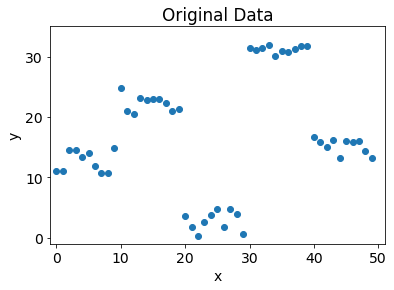

In [3]:
# generate the data
X, y = GenerateData()

PlotData(X,y,title='Original Data', fn='./images/GradientBoosting-000-data.png')

## First Two Steps
We implement the first two basic steps and check the result. First, we initialize a vector __prediction__ that we will use to store the sum of all the predictions.

In [4]:
# initially the prediction is filled with zeros
prediction = np.zeros((50,1))

The first predictor is the mean of the target variable. We init the vector __yp__ for the current prediction with the mean, add it to the vector __prediction__ and plot the result.

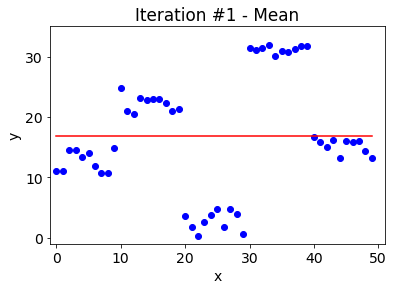

In [5]:
# initially the model is just the mean
yp = np.ones((50,1))*y.mean()

# update the prediction
prediction = np.add(prediction, yp)

PlotModel(X,y,yp=prediction,title='Iteration #1 - Mean',fn='./images/GradientBoosting-001-model.png')

Given the current prediction we compute the residual __y_residual__ as the difference between the target vector __y__ and the current prediction vector __prediction__

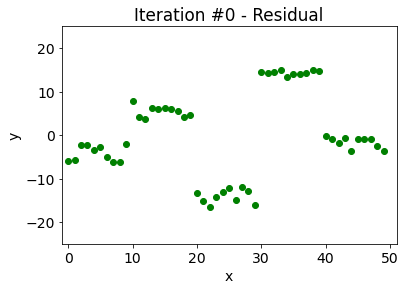

In [6]:
# update the residual
y_residual = np.subtract(y, prediction)
PlotResidual(X,y_residual,title='Iteration #0 - Residual',fn='./images/GradientBoosting-001-residual.png')

The residual are quite similar to the original points but centered around zero since we subtracted the mean. Now it is time to use the first real model training a decision stump (a tree of depth one) to predict the current residual.

In [7]:
clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(X,y_residual)
yp = clf.predict(X)

The prediction for the residual is added to the overall prediction vector __prediction__ and the residual is computed.

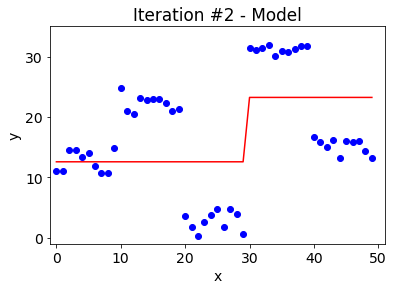

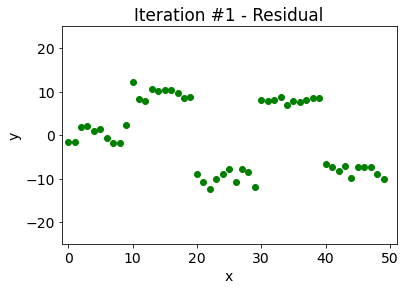

In [8]:
# update the prediction
prediction = np.add(prediction, yp.reshape(-1,1))
PlotModel(X,y,yp=prediction,title='Iteration #2 - Model',fn='./images/GradientBoosting-03-model.png')

y_residual = np.subtract(y, prediction)

PlotResidual(X,y_residual,title='Iteration #1 - Residual',fn='./images/GradientBoosting-04-residual.png')

This step should be repeated until convergence.

## Complete Algorithm
Let's use the previous steps to build a basic algorithm for gradient boosting using regression trees. Note that this only implements training. For testing we would need to store all the models to be able to implement the testing on unseen cases.

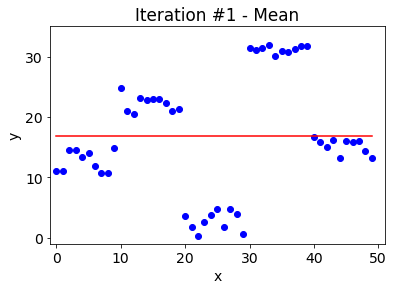

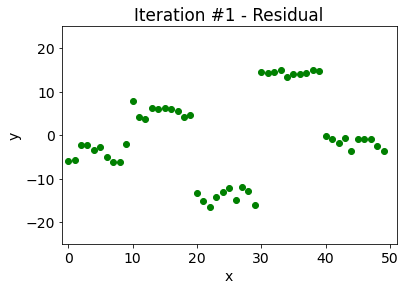

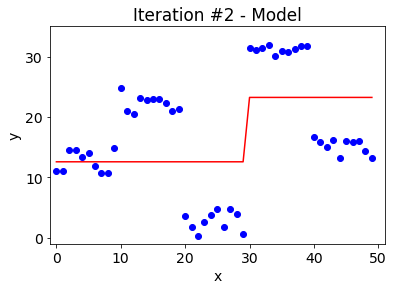

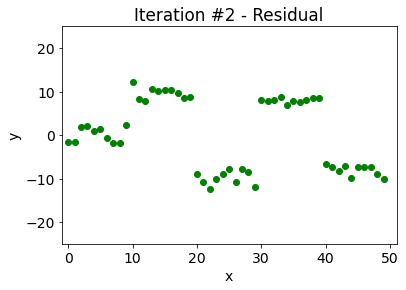

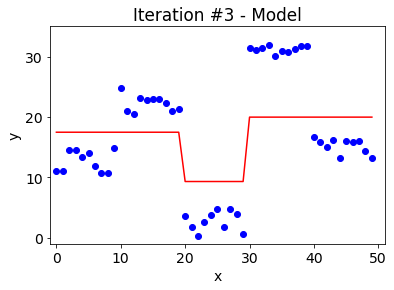

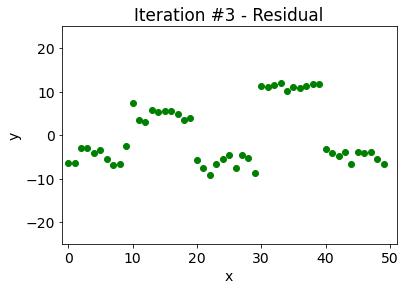

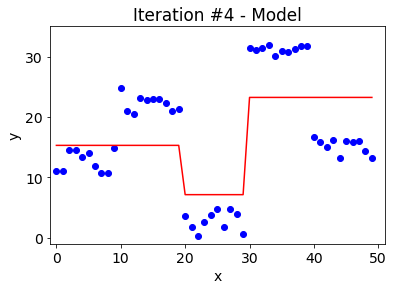

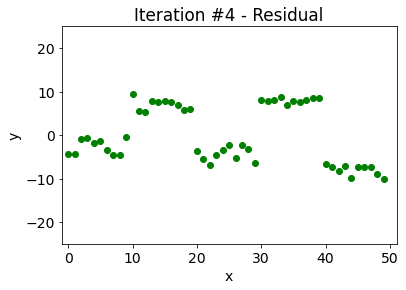

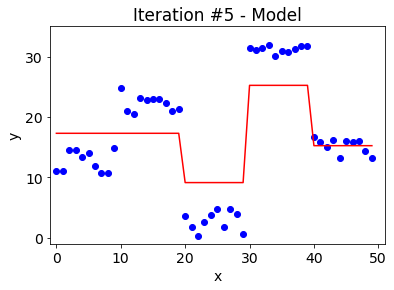

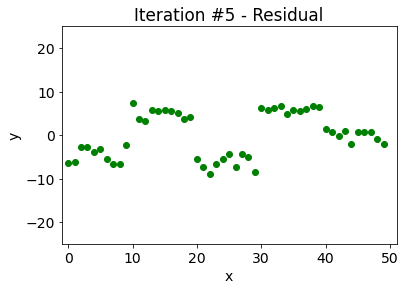

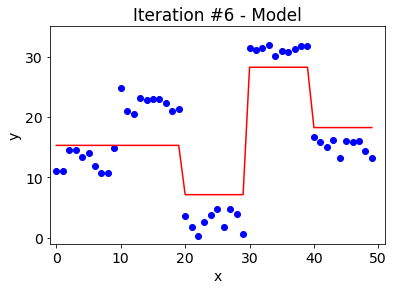

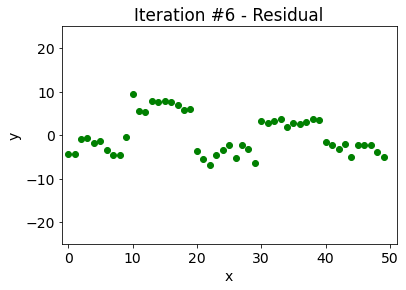

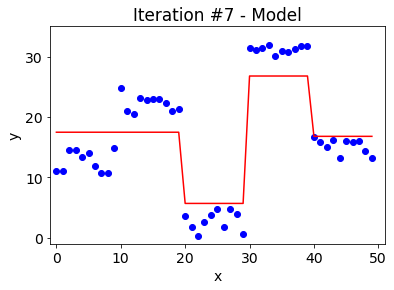

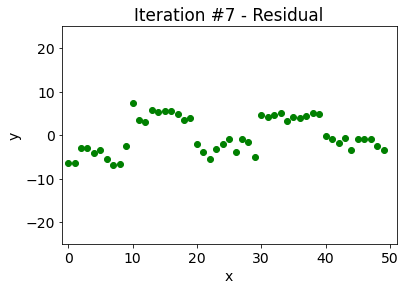

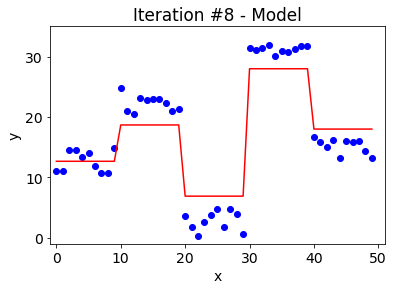

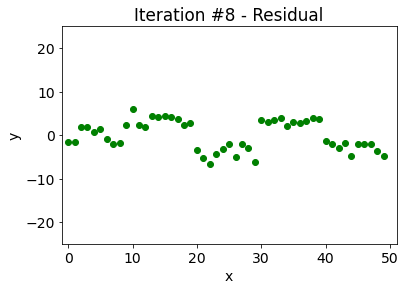

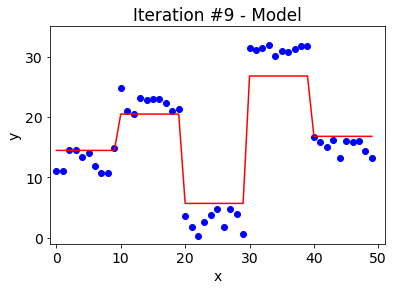

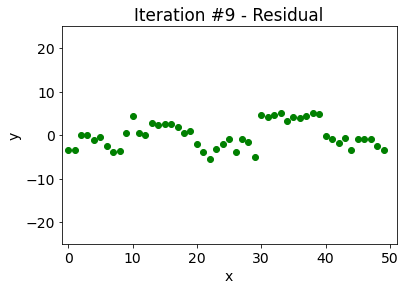

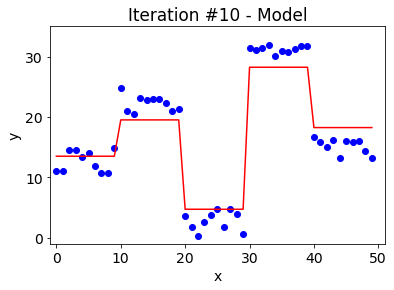

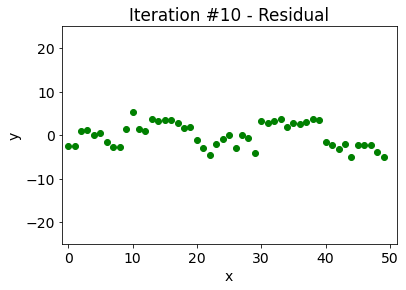

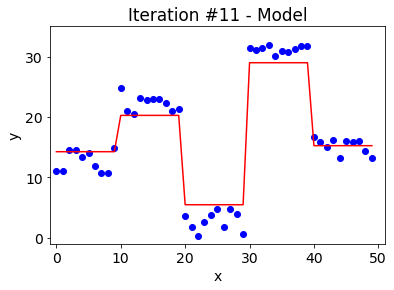

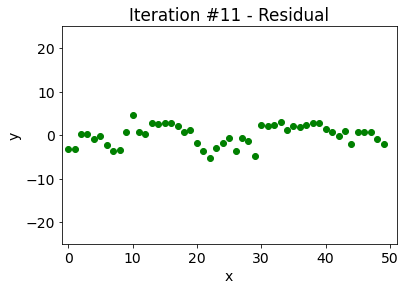

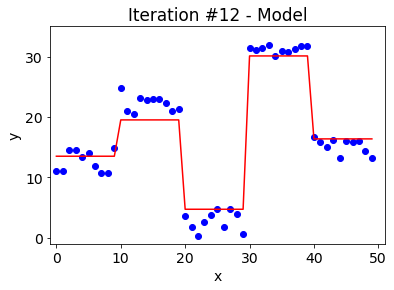

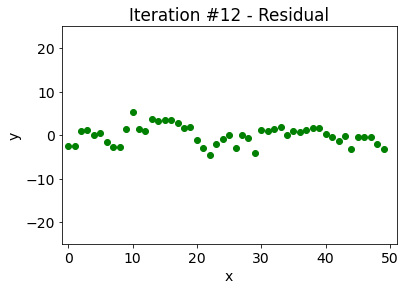

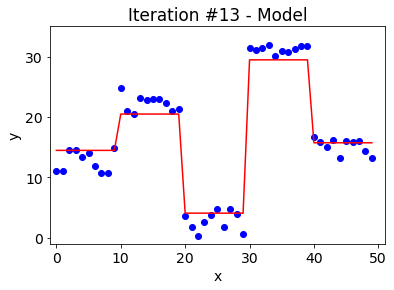

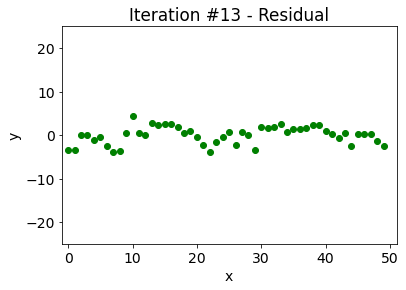

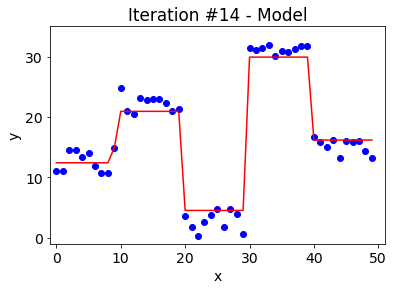

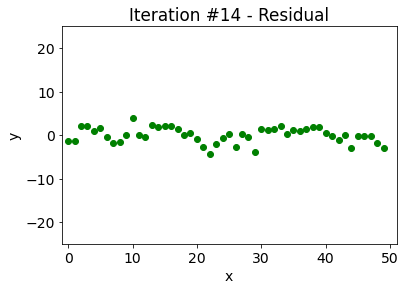

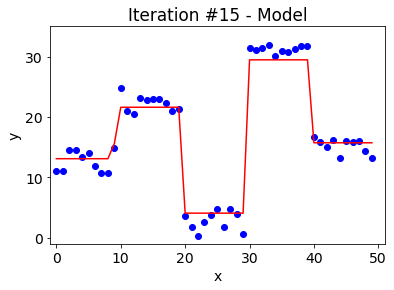

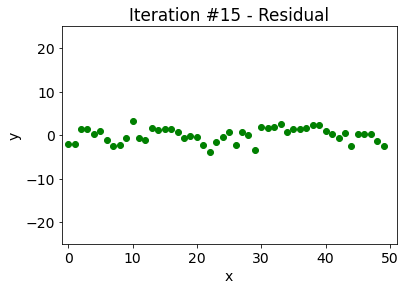

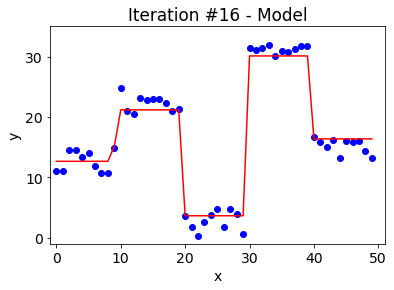

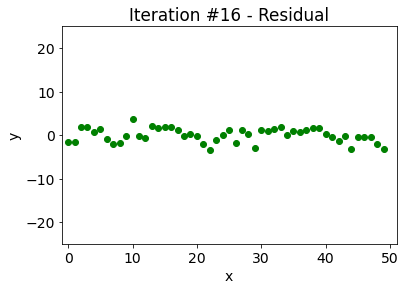

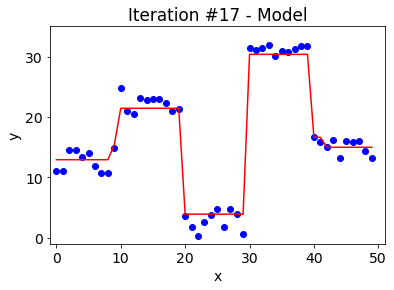

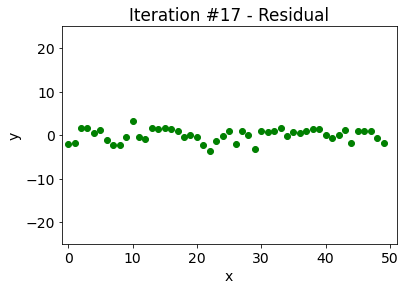

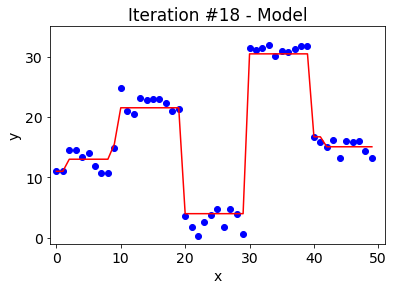

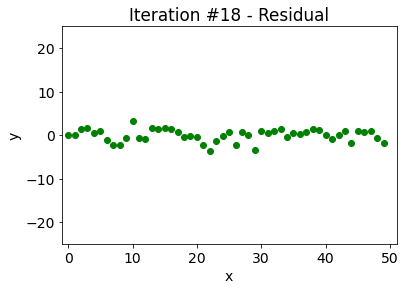

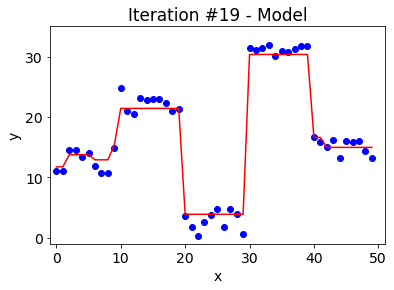

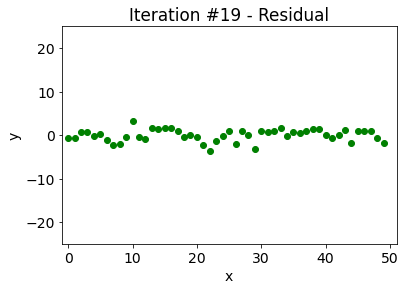

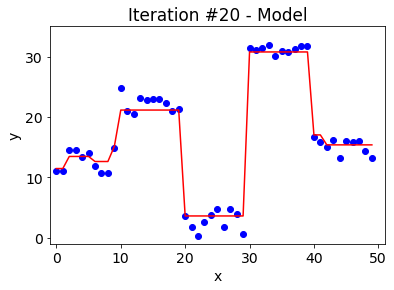

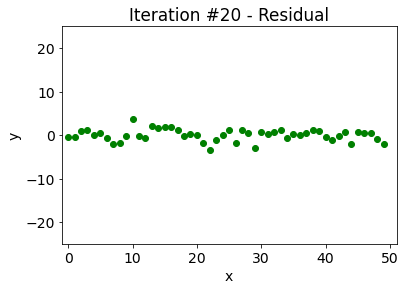

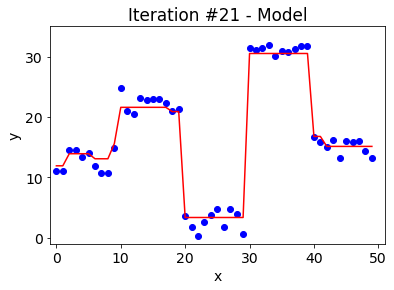

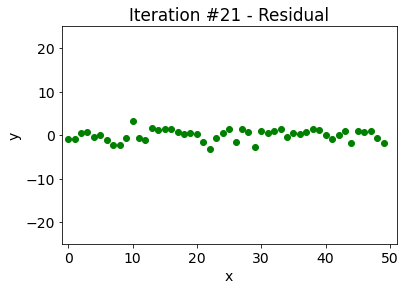

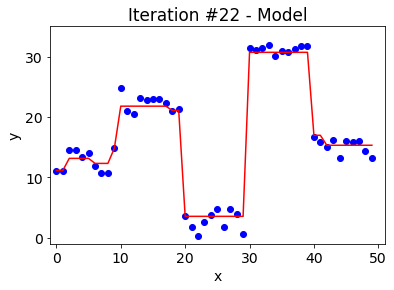

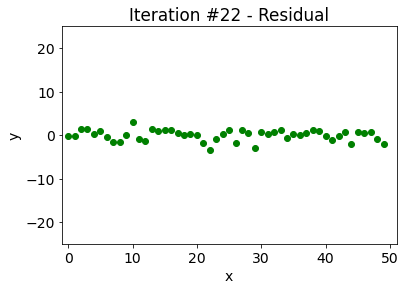

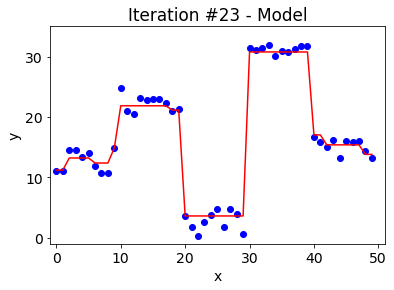

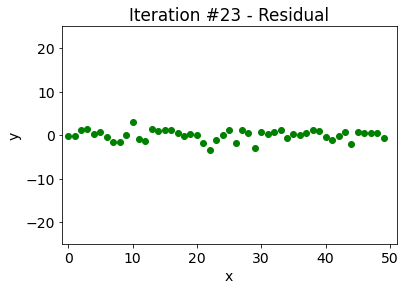

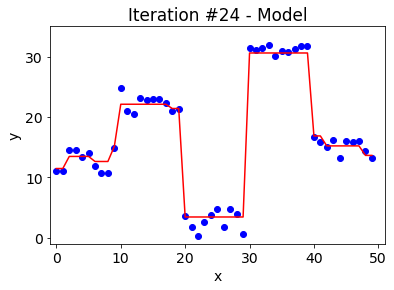

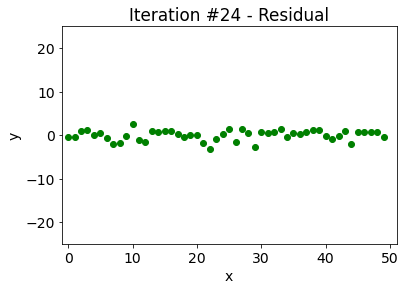

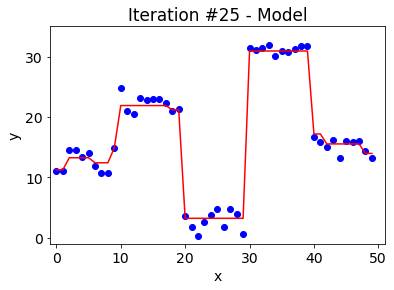

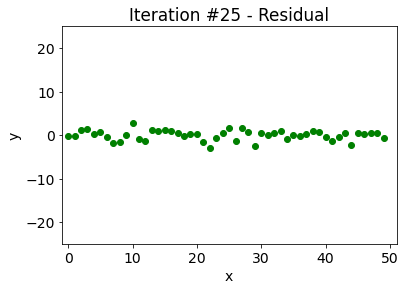

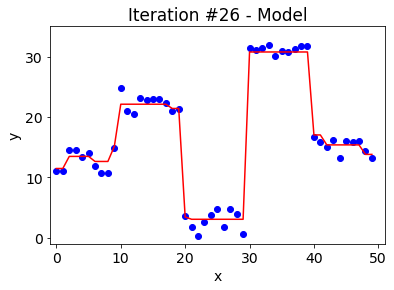

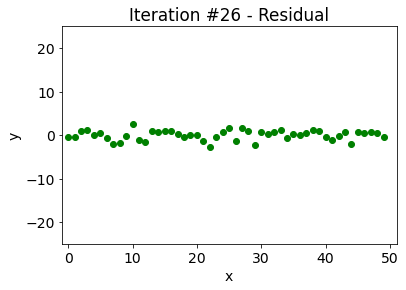

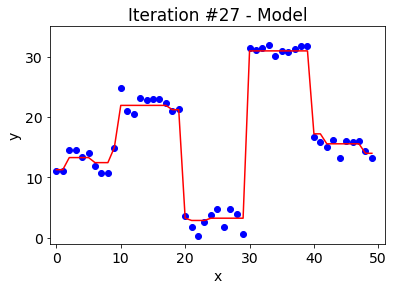

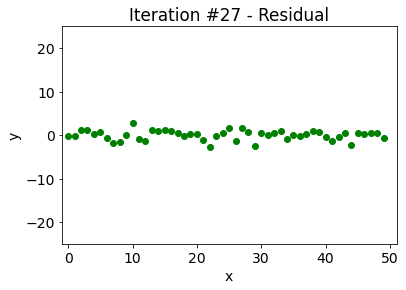

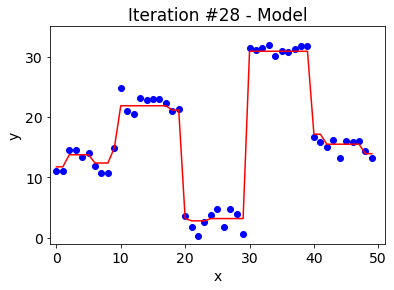

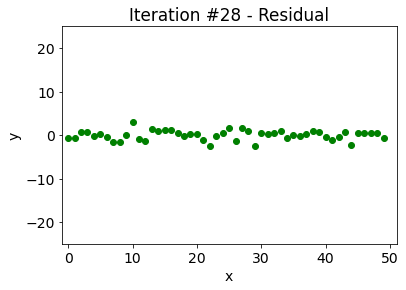

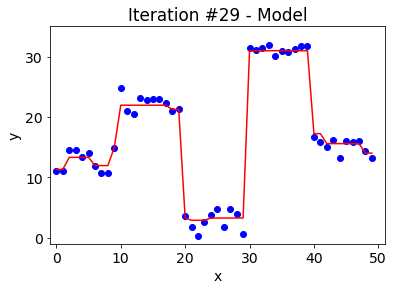

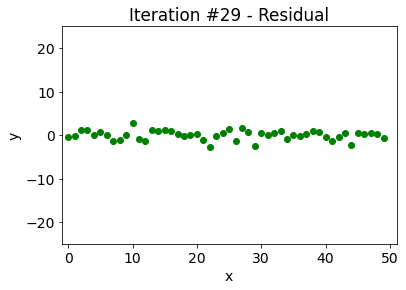

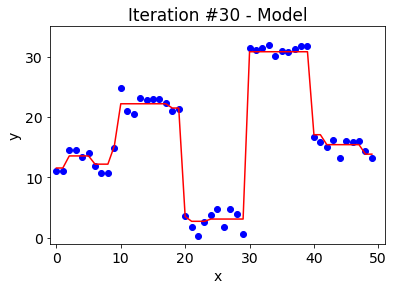

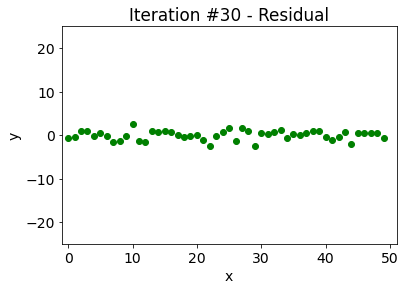

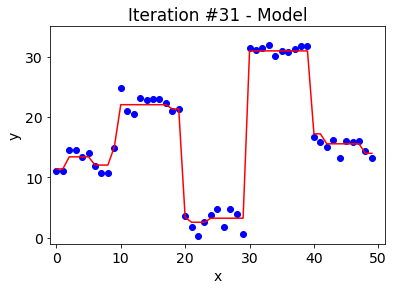

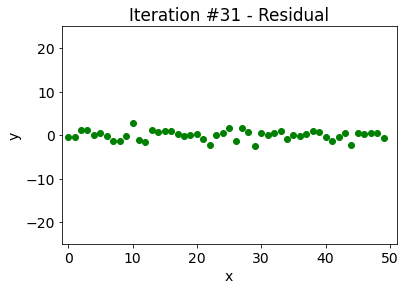

In [9]:
# initially the prediction is filled with zeros
prediction = np.zeros((50,1))

# initially the model is just the mean
yp = np.ones((50,1))*y.mean()
PlotModel(X,y,yp=yp,title='Iteration #1 - Mean',fn='./images/GradientBoosting-001-model.png')

# update the prediction
prediction = np.add(prediction, yp)

# update the residual
y_residual = np.subtract(y, prediction)
PlotResidual(X,y_residual,title='Iteration #1 - Residual',fn='./images/GradientBoosting-001-residual.png')

no_boosting_runs = 30

for i in range(no_boosting_runs):
    clf = tree.DecisionTreeRegressor(max_depth=1)
    clf = clf.fit(X, y_residual)
    yp = clf.predict(X)

    # update the prediction
    prediction = np.add(prediction, yp.reshape(-1, 1))
    PlotModel(X, y, yp=prediction, title=('Iteration #%d - Model'%(i+2)), fn=('./images/GradientBoosting-%03d-model.png'%(i+2)))

    y_residual = np.subtract(y, prediction)

    PlotResidual(X, y_residual, title=('Iteration #%d - Residual'%(i+2)), fn='./images/GradientBoosting-%03d-residual.png'%(i+2))